## FDMS TME3  

Kaggle [How Much Did It Rain? II](https://www.kaggle.com/c/how-much-did-it-rain-ii)

Florian Toque & Paul Willot  

# Dear professor Denoyer...
## Warning  


**This is an early version of our entry for the Kaggle challenge**  

It's still very messy and we send it because we forgot that we had to submit our progress step by step...

**To summarize our goal, we plan to use a RNN to take advantage of the sequential data**

In [85]:
# from __future__ import exam_success
from __future__ import absolute_import
from __future__ import print_function

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

# Sk cheats
from sklearn.cross_validation import cross_val_score  # cross val
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import Imputer   # get rid of nan

* 13.765.202 lines in train.csv  
*  8.022.757 lines in test.csv  

Reduced to

* 10.000
* 5.000

In [58]:
filename = "data/reduced_train_1000000.csv"
train = pd.read_csv(filename)
train = train.set_index('Id')
train = train.dropna()

In [59]:
train.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [62]:
train["Expected"].describe()

count    208668.000000
mean          6.066161
std          30.370965
min           0.010000
25%           0.508000
50%           1.778001
75%           4.064002
max         819.150450
Name: Expected, dtype: float64

Get rid of Nan value for now

In [298]:
train_clean = train[[not i for i in np.isnan(train["Ref_5x5_10th"])]]

*Forums indicate that a higher than 1m rainfall is probably an error. Which is quite understandable. We filter that out*

In [61]:
train = train[train['Expected'] < 1000]

In [300]:
train_clean.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,...,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016
2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016


In [301]:
train_clean.describe()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
count,3812.000000,3812.000000,3797.000000,3812.000000,3812.000000,3812.000000,3808.000000,3812.000000,3812.000000,3812.000000,...,2948.000000,2676.000000,2438.000000,2702.000000,2948.000000,2353.000000,2053.000000,2368.000000,2659.000000,3812.000000
mean,28.244229,9.170252,25.106795,20.418547,24.881689,29.860047,28.023241,23.976784,27.745278,32.286070,...,1.013353,0.594264,-0.535634,0.484572,1.988149,0.069932,-3.233701,-0.346879,3.745275,5.001385
std,17.005761,4.335888,9.680764,9.300325,9.236536,9.363145,9.485070,9.062861,9.082043,9.369318,...,0.028922,1.338388,0.994839,0.793003,1.426959,3.409249,2.734048,2.035334,3.826471,20.272453
min,0.000000,0.000000,-19.000000,-23.000000,-17.500000,-4.500000,-11.500000,-21.000000,-13.500000,-4.000000,...,0.645000,-7.875000,-7.875000,-7.000000,-3.687500,-23.870010,-35.640000,-43.839996,-35.180008,0.010000
25%,13.000000,6.000000,19.500000,15.000000,20.000000,24.500000,22.500000,19.000000,22.500000,26.500000,...,0.995000,-0.062500,-1.000000,0.062500,1.125000,-1.400009,-4.220001,-0.710007,1.759994,0.508000
50%,28.000000,10.000000,25.500000,21.000000,25.000000,30.000000,28.000000,24.000000,28.000000,32.500000,...,0.998333,0.500000,-0.437500,0.437500,1.687500,0.000000,-2.470001,0.000000,3.169998,1.778001
75%,42.000000,12.000000,31.500000,26.500000,31.000000,36.000000,34.000000,30.000000,33.500000,38.000000,...,1.051667,1.125000,0.062500,0.812500,2.500000,1.729996,-1.410004,0.349991,5.279999,3.810002
max,59.000000,20.000000,61.500000,57.000000,61.500000,66.500000,68.000000,59.500000,64.000000,68.000000,...,1.051667,7.937500,2.625000,7.937500,7.937500,19.319992,1.059998,4.190002,43.209990,876.300500


In [49]:
train_clean['Expected'].describe()

count    3812.000000
mean        5.001385
std        20.272453
min         0.010000
25%         0.508000
50%         1.778001
75%         3.810002
max       876.300500
Name: Expected, dtype: float64

---

_Memento  (mauri)_

---


---

In [ ]:
RandomForestRegressor()

In [54]:
etreg = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)

In [294]:
"""
columns = train_clean.columns
columns = ["minutes_past","radardist_km","Ref","Ref_5x5_10th", "Ref_5x5_50th"]
columns = [u'Id', u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th', u'Expected']
"""
columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
 
labels = train_clean["Expected"].values
features = train_clean[list(columns)].values

In [295]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(features)
features_trans = imp.transform(features)

In [138]:
ftrain = features_trans[:3000]
ltrain = labels[:3000]
ftest = features_trans[3000:]
ltest = labels[3000:]

In [139]:
%%time
etreg.fit(ftrain,ltrain)

CPU times: user 1.25 s, sys: 42.6 ms, total: 1.3 s
Wall time: 1.3 s


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=1, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
          verbose=0, warm_start=False)

In [89]:
def scorer(estimator, X, y):
    return (estimator.predict(X[0])-y)**2

In [140]:
%%time
et_score = cross_val_score(etreg, features_trans, labels, cv=5)
 
print("Features: %s\nScore: %s\tMean: %.03f"%(columns, et_score,et_score.mean()))

Features: [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th', u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite', u'RefComposite_5x5_10th', u'RefComposite_5x5_50th', u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th', u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th', u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th', u'Kdp_5x5_50th', u'Kdp_5x5_90th']
Score: [ -2.26736705e-03   7.75750100e-01  -3.28141465e+00   1.32098540e-01
  -6.60898231e+00]	Mean: -1.797)
CPU times: user 6.21 s, sys: 146 ms, total: 6.35 s
Wall time: 6.35 s


In [141]:
r = random.randrange(len(ltrain))
print(r)
print(etreg.predict(ftrain[r]))
print(ltrain[r])

2910
[ 6.858004]
6.858004


In [153]:
r = random.randrange(len(ltest))
print(r)
print(etreg.predict(ftest[r]))
print(ltest[r])

654
[ 3.90697198]
2.7940013


In [143]:
err = (etreg.predict(ftest)-ltest)**2

In [144]:
err.sum()/len(err)

196.01609423033887

---

Submit

---

In [154]:
filename = "data/reduced_test_5000.csv"
test = pd.read_csv(filename)

In [164]:
columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
features = test[list(columns)].values

In [165]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(features)
features_trans = imp.transform(features)

In [166]:
fall = test[test.columns].values

In [177]:
fall[20]

array([  2.,  12.,  15.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [173]:
features_trans[0]

array([  1.        ,   8.        ,  22.41518913,  19.80155642,
        22.10491607,  14.        ,  24.05639308,  21.99042553,
        23.72933182,  15.        ,   0.98224537,   0.93533269,
         0.98130561,   1.01558046,   0.47618814,  -0.66830184,
         0.24352433,   1.84881703,   0.33119267,  -3.23234445,
        -0.39269493,   3.89739166])

In [188]:
i = 1
pred = 0
while fall[i][0] == 1:
    #print(fall[i])
    pred+=etreg.predict(features_trans[i])[0]
    #print(etreg.predict(features_trans[i])[0])
    i+=1
print(i)

17


In [192]:
fall[-1][0]

460.0

In [202]:
%%time
res=[]
i=0
while i<len(fall) and i < 10000:
    pred = 0
    lenn = 0
    curr=fall[i][0]
    while i<len(fall) and fall[i][0] == curr:
        #print(fall[i])
        pred+=etreg.predict(features_trans[i])[0]
        #print(etreg.predict(features_trans[i])[0])
        i+=1
        lenn += 1
    res.append((curr,pred/lenn))
    #i+=1
    #print(i)

CPU times: user 11.9 s, sys: 47.2 ms, total: 11.9 s
Wall time: 12 s


In [199]:
len(res)

460

In [203]:
res[:10]

[(1.0, 2.1142275617605883),
 (2.0, 1.0368167780596871),
 (3.0, 6.6831796034460016),
 (4.0, 7.0145211283436399),
 (5.0, 2.3839445058508328),
 (6.0, 3.2730617268046158),
 (7.0, 4.1804031388372724),
 (8.0, 1.9472981445571425),
 (9.0, 1.0272548098142853),
 (10.0, 8.0115426694183345)]

In [228]:
def myfunc(hour):
    #rowid = hour['Id'].iloc[0]
    # sort hour by minutes_past
    hour = hour.sort('minutes_past', ascending=True)
    #est = (hour['Id'],random.random())
    est = random.random()
    return est

In [275]:
def marshall_palmer(ref, minutes_past):
    #print("Estimating rainfall from {0} observations".format(len(minutes_past)))
    # how long is each observation valid?
    valid_time = np.zeros_like(minutes_past)
    valid_time[0] = minutes_past.iloc[0]
    for n in xrange(1, len(minutes_past)):
        valid_time[n] = minutes_past.iloc[n] - minutes_past.iloc[n-1]
    valid_time[-1] = valid_time[-1] + 60 - np.sum(valid_time)
    valid_time = valid_time / 60.0

    # sum up rainrate * validtime
    sum = 0
    for dbz, hours in zip(ref, valid_time):
        # See: https://en.wikipedia.org/wiki/DBZ_(meteorology)
        if np.isfinite(dbz):
            mmperhr = pow(pow(10, dbz/10)/200, 0.625)
            sum = sum + mmperhr * hours
    return sum


def simplesum(ref,hour):
    hour.sum()

# each unique Id is an hour of data at some gauge
def myfunc(hour):
    #rowid = hour['Id'].iloc[0]
    # sort hour by minutes_past
    hour = hour.sort('minutes_past', ascending=True)
    est = marshall_palmer(hour['Ref'], hour['minutes_past'])
    return est

In [276]:
estimates = train.groupby(train.index).apply(myfunc)
estimates.head(20)

In [241]:
train["Expected"].head(20)

0      0.254000
1      0.254000
2      0.254000
3      0.254000
4      0.254000
5      0.254000
6      1.016000
7      1.016000
8      1.016000
9      1.016000
10     1.016000
11     1.016000
12     1.016000
13     1.016000
14     1.016000
15     1.016000
16     1.016000
17     1.016000
18    26.162014
19    26.162014
Name: Expected, dtype: float64

In [ ]:
res=[]
for i in fall:
    pred = 0
    curr=i[0]
    while fall[i][0] == 1:
        #print(fall[i])
        pred+=etreg.predict(features_trans[i])[0]
        #print(etreg.predict(features_trans[i])[0])
        i+=1
    print(i)

In [178]:
etreg.predict(features_trans[0])

array([ 2.08148106])

In [291]:
def marshall_palmer(data):
    res=[]
    for n in data:
        res.append(etreg.predict(n)[0])
    return np.array(res).mean()


def simplesum(ref,hour):
    hour.sum()

def myfunc(hour):
    hour = hour.sort('minutes_past', ascending=True)
    est = marshall_palmer(hour[train.columns])
    return est

In [302]:
estimates = train_clean.groupby(train_clean.index).apply(myfunc)
estimates.head(20)

ValueError: could not convert string to float: minutes_past

---

RNN


---

In [9]:
import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  


In [136]:
#columns = [u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
#       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
#       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
#       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
#       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
#       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
#       u'Kdp_5x5_50th', u'Kdp_5x5_90th']
columns = [u'radardist_km', u'Ref', u'Ref_5x5_10th']
nb_features = len(columns)
data = train[list(columns)]
data.head(10)

,radardist_km,Ref,Ref_5x5_10th
Id,,,
2,2,9.0,5.0
2,2,18.0,14.0
2,2,24.5,16.5
2,2,12.0,12.0
2,2,22.5,19.0
2,2,14.0,14.0
2,2,12.0,11.0
2,2,1.5,3.5
2,2,16.0,14.5


In [11]:
data.iloc[0].as_matrix()

array([  1.        ,   2.        ,   9.        ,   5.        ,
         7.5       ,  10.5       ,  15.        ,  10.5       ,
        16.5       ,  23.5       ,   0.99833333,   0.99833333,
         0.99833333,   0.99833333,   0.375     ,  -0.125     ,
         0.3125    ,   0.875     ,   1.0599976 ,  -1.4100037 ,
        -0.3500061 ,   1.0599976 ])

In [12]:
train.head(5)

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [13]:
train.loc[11]

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
11,1,12,21.0,16.5,20.0,23.0,21.0,16.5,20.0,23.0,...,1.015000,-0.4375,-0.4375,0.2500,0.8750,-1.410004,-1.760010,1.059998,3.879990,2.540001
11,10,12,23.5,22.0,24.5,26.5,23.5,22.0,24.5,26.5,...,1.001667,0.5625,-0.1250,0.2500,0.7500,0.709991,-2.470001,0.000000,2.119995,2.540001
11,20,12,20.0,17.0,19.5,23.0,20.0,17.0,19.5,23.0,...,1.001667,0.0625,-0.3125,0.0625,0.5625,-1.059998,-2.110001,-1.059998,1.759994,2.540001
11,29,12,16.5,16.5,19.0,23.0,16.5,16.5,19.0,23.0,...,0.998333,0.0000,-0.6875,0.1250,0.9375,-3.169998,-3.169998,0.709991,2.470001,2.540001
11,39,12,20.0,16.5,18.5,21.5,20.0,16.5,18.5,21.5,...,1.021667,0.6875,-0.3750,0.3125,1.2500,-1.340012,-1.360001,-0.350006,1.759994,2.540001
11,49,12,19.0,18.0,19.5,22.0,19.0,18.0,19.5,22.0,...,1.035000,1.4375,-0.6250,0.1875,1.3125,-3.169998,-3.169998,-1.059998,3.509994,2.540001
11,58,12,15.0,15.0,18.5,22.5,15.0,15.0,18.5,22.5,...,1.008333,1.0625,-0.4375,0.1875,1.0625,-0.710007,-3.169998,-0.350006,1.759994,2.540001


In [14]:
train.loc[11][:1]["Expected"].as_matrix

<bound method Series.as_matrix of Id
11    2.540001
Name: Expected, dtype: float64>

In [15]:
#train.index.unique()

In [16]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(data)

/Library/Python/2.7/site-packages/pandas/core/index.py:843: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


In [21]:
np.shape(X_train)

(1743, 100, 22)

In [18]:
t = np.array([2,1])
t.shape = (1,2)
t.tolist()[0]

[2, 1]

In [689]:
np.shape(t)

(2, 1)

In [774]:
X_train[:2,:2]

array([[[ 5.88354853,  1.30745523],
        [ 5.22982091,  1.96118284]],

       [[ 5.22982091,  1.96118284],
        [ 4.5760933 ,  2.61491046]]])

In [772]:
XX[:2,:2]

IndexError: too many indices

In [773]:
XX[:2][:2]

array([ array([[  1.        ,   2.        ,   9.        ,   5.        ,
          7.5       ,  10.5       ,  15.        ,  10.5       ,
         16.5       ,  23.5       ,   0.99833333,   0.99833333,
          0.99833333,   0.99833333,   0.375     ,  -0.125     ,
          0.3125    ,   0.875     ,   1.0599976 ,  -1.4100037 ,
         -0.3500061 ,   1.0599976 ,   1.0160005 ],
       [ 16.        ,   2.        ,  18.        ,  14.        ,
         17.5       ,  21.        ,  20.5       ,  18.        ,
         20.5       ,  23.        ,   0.995     ,   0.995     ,
          0.99833333,   1.0016667 ,   0.25      ,   0.125     ,
          0.375     ,   0.6875    ,   0.34999084,  -1.0599976 ,
          0.        ,   1.0599976 ,   1.0160005 ],
       [ 21.        ,   2.        ,  24.5       ,  16.5       ,
         21.        ,  24.5       ,  24.5       ,  21.        ,
         24.        ,  28.        ,   0.99833333,   0.995     ,
          0.99833333,   0.99833333,   0.25      ,   0.0625

In [50]:
np.shape(XX)

(297, 50, 22)

In [30]:
for i in XX:
    print(np.shape(i))

(9, 23)
(12, 23)
(7, 23)
(10, 23)
(3, 23)
(23,)
(12, 23)
(5, 23)
(11, 23)
(3, 23)
(6, 23)
(9, 23)
(13, 23)
(11, 23)
(12, 23)
(8, 23)
(2, 23)
(4, 23)
(9, 23)
(12, 23)
(6, 23)
(10, 23)
(14, 23)
(6, 23)
(10, 23)
(4, 23)
(3, 23)
(4, 23)
(6, 23)
(23,)
(9, 23)
(6, 23)
(10, 23)
(23,)
(23,)
(23,)
(23,)
(10, 23)
(23,)
(11, 23)
(4, 23)
(13, 23)
(5, 23)
(11, 23)
(10, 23)
(12, 23)
(5, 23)
(6, 23)
(7, 23)
(7, 23)
(10, 23)
(23,)
(23,)
(6, 23)
(23,)
(23,)
(9, 23)
(7, 23)
(23,)
(12, 23)
(10, 23)
(9, 23)
(4, 23)
(23,)
(5, 23)
(13, 23)
(12, 23)
(23,)
(2, 23)
(2, 23)
(11, 23)
(10, 23)
(4, 23)
(6, 23)
(11, 23)
(4, 23)
(11, 23)
(12, 23)
(3, 23)
(3, 23)
(7, 23)
(8, 23)
(23,)
(6, 23)
(12, 23)
(13, 23)
(12, 23)
(8, 23)
(2, 23)
(9, 23)
(10, 23)
(11, 23)
(4, 23)
(12, 23)
(9, 23)
(6, 23)
(13, 23)
(23,)
(6, 23)
(11, 23)
(3, 23)
(11, 23)
(13, 23)
(13, 23)
(9, 23)
(11, 23)
(7, 23)
(8, 23)
(7, 23)
(13, 23)
(10, 23)
(6, 23)
(11, 23)
(5, 23)
(5, 23)
(7, 23)
(4, 23)
(14, 23)
(4, 23)
(4, 23)
(23,)
(23,)
(4, 23)
(2, 23)


In [22]:
np.shape(XX[0])

(9, 23)

In [28]:
z = np.zeros([297,9,23])

In [29]:
np.shape(z)

(297, 9, 23)

In [791]:
np.shape(np.reshape(XX,(297,1)))

(1, 297)

In [716]:
tl = train.loc[2][:1]["Expected"]

In [718]:
tl.as_blocks()

{'float64': Id
 2    1.016
 Name: Expected, dtype: float64}

In [719]:
tl.as_matrix()

array([ 1.0160005])

In [777]:
data.iloc[2:4].as_matrix()

array([[ 4.5760933 ,  2.61491046],
       [ 3.92236568,  3.26863807]])

In [776]:
train.loc[2].as_matrix()

array([[  1.        ,   2.        ,   9.        ,   5.        ,
          7.5       ,  10.5       ,  15.        ,  10.5       ,
         16.5       ,  23.5       ,   0.99833333,   0.99833333,
          0.99833333,   0.99833333,   0.375     ,  -0.125     ,
          0.3125    ,   0.875     ,   1.0599976 ,  -1.4100037 ,
         -0.3500061 ,   1.0599976 ,   1.0160005 ],
       [ 16.        ,   2.        ,  18.        ,  14.        ,
         17.5       ,  21.        ,  20.5       ,  18.        ,
         20.5       ,  23.        ,   0.995     ,   0.995     ,
          0.99833333,   1.0016667 ,   0.25      ,   0.125     ,
          0.375     ,   0.6875    ,   0.34999084,  -1.0599976 ,
          0.        ,   1.0599976 ,   1.0160005 ],
       [ 21.        ,   2.        ,  24.5       ,  16.5       ,
         21.        ,  24.5       ,  24.5       ,  21.        ,
         24.        ,  28.        ,   0.99833333,   0.995     ,
          0.99833333,   0.99833333,   0.25      ,   0.0625    ,
  

In [46]:
m = data.loc[10].as_matrix()
pad = np.pad(m, ((0, max_padding -len(m) ),(0,0)), 'constant')

In [47]:
pad

array([[  2.        ,  10.        ,  32.5       , ...,  -6.330002  ,
          0.70999146,  11.089996  ],
       [  6.        ,  10.        ,  37.5       , ..., -11.75      ,
          0.        ,   8.429993  ],
       [ 11.        ,  10.        ,  36.        , ..., -13.449997  ,
         -3.1699982 ,   8.080002  ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
train.index.unique()

array([  2,  10,  11,  12,  14,  15,  17,  18,  24,  27,  29,  32,  33,
        34,  38,  41,  51,  56,  58,  62,  69,  72,  73,  74,  77,  78,
        87,  90,  92,  94,  98, 102, 103, 104, 105, 106, 111, 117, 123,
       127, 128, 133, 135, 136, 139, 144, 145, 151, 153, 155, 156, 160,
       163, 164, 166, 174, 177, 178, 184, 186, 188, 189, 191, 192, 193,
       198, 200, 206, 208, 210, 219, 220, 221, 224, 225, 226, 227, 230,
       237, 240, 243, 245, 246, 249, 250, 251, 254, 255, 261, 263, 265,
       266, 269, 274, 276, 279, 280, 284, 285, 288, 289, 291, 300, 302,
       304, 309, 310, 316, 322, 325, 327, 330, 332, 335, 336, 340, 341,
       344, 345, 347, 348, 350, 353, 358, 361, 362, 364, 365, 366, 368,
       369, 371, 373, 379, 382, 390, 391, 396, 402, 403, 404, 405, 406,
       410, 411, 416, 418, 425, 429, 431, 432, 436, 438, 442, 443, 445,
       451, 453, 462, 465, 474, 475, 476, 483, 489, 495, 500, 502, 506,
       521, 523, 527, 531, 539, 541, 545, 546, 547, 548, 551, 55

In [132]:
max_padding = 20

In [137]:
%%time

docX, docY = [], []
for i in train.index.unique():
    if isinstance(train.loc[i],pd.core.series.Series):
        m = [data.loc[i].as_matrix()]
        pad = np.pad(m, ((0, max_padding -len(m) ),(0,0)), 'constant')
        docX.append(pad)
        docY.append(float(train.loc[i]["Expected"]))
    else:
        m = data.loc[i].as_matrix()
        pad = np.pad(m, ((0, max_padding -len(m) ),(0,0)), 'constant')
        docX.append(pad)
        docY.append(float(train.loc[i][:1]["Expected"]))
    #docY.append(train.loc[i][:1]["Expected"].as_matrix)
XX = np.array(docX)
yy = np.array(docY)

CPU times: user 18.4 s, sys: 59.5 ms, total: 18.5 s
Wall time: 18.5 s


In [138]:
np.shape(XX)

(28899, 20, 3)

In [34]:
def _load_data(data):  
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in data.index.unique():
        #np.pad(tmp, ((0, max_padding -len(tmp) ),(0,0)), 'constant')
        m = data.loc[i].as_matrix()
        pad = np.pad(m, ((0, max_padding -len(m) ),(0,0)), 'constant')
        docX.append(pad)
        if isinstance(train.loc[i],pd.core.series.Series):
            docY.append(float(train.loc[i]["Expected"]))
        else:
            docY.append(float(train.loc[i][:1]["Expected"]))
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(train)

ValueError: Unable to create correctly shaped tuple from ((0, 27), (0, 0))

In [375]:
len(X_train[0])

100

In [394]:
train.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
10,2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
11,2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
12,2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [423]:
X_train[0][:10]

array([[ 2.66313169,  0.59180704],
       [ 2.36722817,  0.88771056],
       [ 2.07132464,  1.18361408],
       [ 1.77542112,  1.4795176 ],
       [ 1.4795176 ,  1.77542112],
       [ 1.18361408,  2.07132464],
       [ 0.88771056,  2.36722817],
       [ 0.59180704,  2.66313169],
       [ 0.29590352,  2.95903521],
       [ 0.59180704,  2.66313169]])

In [424]:
yt = []
for i in y_train:
    yt.append([i[0]])

In [425]:
yt[0]

[0.88771056196653186]

In [439]:
X_train.shape

(16091, 100, 2)

In [450]:
len(fea[0])

21

In [449]:
len(X_train[0][0])

2

In [442]:
f = np.array(fea)

In [443]:
f.shape()

TypeError: 'tuple' object is not callable

In [428]:
#(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data

# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, yt, batch_size=450, nb_epoch=2, validation_split=0.05)  

Train on 15286 samples, validate on 805 samples
Epoch 0
15286/15286 [==============================] - 11s - loss: 1.4571 - val_loss: 0.5908
Epoch 1
15286/15286 [==============================] - 10s - loss: 0.4297 - val_loss: 0.3123


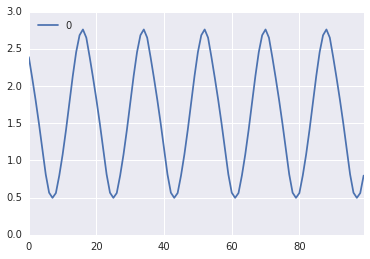

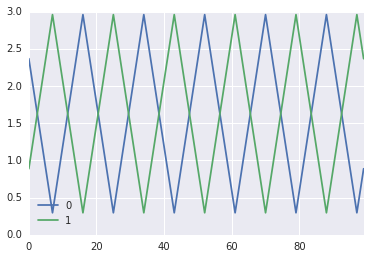

In [393]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

# and maybe plot it
pd.DataFrame(predicted[:100]).plot()  
pd.DataFrame(y_test[:100]).plot()  

In [531]:
filename = "data/reduced_train_10000.csv"
train = pd.read_csv(filename)
train = train.dropna()
train = train.set_index('Id')

In [533]:
train.head(10)

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,...,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,...,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,...,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016
2,37,2,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,...,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998,1.016
2,42,2,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,...,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991,1.016
2,47,2,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,...,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998,1.016
2,53,2,16.0,14.5,18.0,23.5,28.0,23.5,26.5,29.5,...,0.998333,0.8750,0.6250,0.9375,1.3750,-0.350006,-1.410004,-0.350006,2.119995,1.016


In [472]:
columns = [u'Id', u'minutes_past', u'radardist_km', u'Ref', u'Ref_5x5_10th',
       u'Ref_5x5_50th', u'Ref_5x5_90th', u'RefComposite',
       u'RefComposite_5x5_10th', u'RefComposite_5x5_50th',
       u'RefComposite_5x5_90th', u'RhoHV', u'RhoHV_5x5_10th',
       u'RhoHV_5x5_50th', u'RhoHV_5x5_90th', u'Zdr', u'Zdr_5x5_10th',
       u'Zdr_5x5_50th', u'Zdr_5x5_90th', u'Kdp', u'Kdp_5x5_10th',
       u'Kdp_5x5_50th', u'Kdp_5x5_90th']

 
labels = train["Expected"].values
features = train[list(columns)].values

In [474]:
np.shape(features)

(2048, 23)

In [475]:
#max_padding = np.array([len(i) for i in fea]).max()
max_padding = 14

In [494]:
fea=[]
lab=[]
init=features[0][0]
tmp=[]

for idx,i in enumerate(features):
    if i[0]==init:
        tmp.append(i[1:])
    else:
        fea.append(np.pad(tmp, ((0, max_padding -len(tmp) ),(0,0)), 'constant').tolist())
        lab.append(labels[idx])
        tmp=[]
        init=i[0]
        tmp.append(i[1:])
fea.append(np.array(tmp))
lab.append(labels[idx])

In [495]:
f = np.array(fea)
y = np.array(lab)

In [463]:
type(X_train[0][0])

numpy.ndarray

In [462]:
type(f[0][0])

numpy.ndarray

In [452]:
fea[0]

array([[  1.        ,   2.        ,   9.        ,   5.        ,
          7.5       ,  10.5       ,  15.        ,  10.5       ,
         16.5       ,  23.5       ,   0.99833333,   0.99833333,
          0.99833333,   0.99833333,   0.375     ,  -0.125     ,
          0.3125    ,   0.875     ,   1.0599976 ,  -1.4100037 ,
         -0.3500061 ,   1.0599976 ],
       [ 16.        ,   2.        ,  18.        ,  14.        ,
         17.5       ,  21.        ,  20.5       ,  18.        ,
         20.5       ,  23.        ,   0.995     ,   0.995     ,
          0.99833333,   1.0016667 ,   0.25      ,   0.125     ,
          0.375     ,   0.6875    ,   0.34999084,  -1.0599976 ,
          0.        ,   1.0599976 ],
       [ 21.        ,   2.        ,  24.5       ,  16.5       ,
         21.        ,  24.5       ,  24.5       ,  21.        ,
         24.        ,  28.        ,   0.99833333,   0.995     ,
          0.99833333,   0.99833333,   0.25      ,   0.0625    ,
          0.1875    ,   0.5625

In [421]:
t = np.array([[1,2,3],
              [3,4,4]])
np.pad(t, ((0, max_padding -len(t) ),(0,0)), 'constant')

array([[1, 2, 3],
       [3, 4, 4],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [51]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding

In [141]:
%%time
input_dim = max_padding
out_dim = 1  
hidden_dim = 200

model = Sequential()
#Embedding(input_dim, hidden_dim, mask_zero=True)
#model.add(LSTM(hidden_dim, hidden_dim, return_sequences=False))  
model.add(LSTM(nb_features, hidden_dim, return_sequences=False))  
model.add(Dense(hidden_dim, out_dim))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")  

CPU times: user 45.1 s, sys: 574 ms, total: 45.6 s
Wall time: 46.6 s


In [172]:
model.fit(XX, yy, batch_size=50, nb_epoch=20, validation_split=0.05)  

Train on 27454 samples, validate on 1445 samples
Epoch 0
27454/27454 [==============================] - 72s - loss: 762.3288 - val_loss: 2621.0195
Epoch 1
27454/27454 [==============================] - 70s - loss: 762.8043 - val_loss: 2603.3075
Epoch 2
27454/27454 [==============================] - 69s - loss: 762.4551 - val_loss: 2612.1847
Epoch 3
27454/27454 [==============================] - 70s - loss: 762.0105 - val_loss: 2617.8891
Epoch 4
27454/27454 [==============================] - 70s - loss: 761.4277 - val_loss: 2629.0874
Epoch 5
27454/27454 [==============================] - 78s - loss: 761.2045 - val_loss: 2598.8357
Epoch 6
27454/27454 [==============================] - 100s - loss: 762.5309 - val_loss: 2621.1124
Epoch 7
27454/27454 [==============================] - 79s - loss: 761.6411 - val_loss: 2618.9652
Epoch 8
27454/27454 [==============================] - 65s - loss: 761.8496 - val_loss: 2621.2338
Epoch 9
22250/27454 [=======================>......] - ETA: 14s - lo

KeyboardInterrupt: 

In [203]:
test = random.randint(0,len(XX))
print(model.predict(XX[test:test+1])[0][0])
print(yy[test])

3.23107931119
1.0160005
